## In this notebook we demonstrate the use of the package Achedmy on two different reaction systems and compare it to mass action kinetics:

In [1]:
push!(LOAD_PATH, "../src/Achedmy/")
using Achedmy
using Pkg
using PyPlot
using Catalyst
using LinearAlgebra
using DifferentialEquations

### Define the simulation Parameters:

In [2]:
#Parameters simulation
tstart= 0.
tmax = 2.
atol = 1e-3
rtol = 1e-2

0.01

### Define the reaction system $A+A \rightarrow A$ and the defaults or initialization using Catalyst:

In [108]:
rs_aaa = @reaction_network AAA begin
    @species A(t)= 4. /3
    @parameters k1A = 1. k2A = 1. k3 = 1. 
  (k3), A+A --> A
  (k2A,k1A), A <--> 0 
end

Model AAA
States (1):
  A(t) [defaults to 1.33333]
Parameters (3):
  k1A [defaults to 1.0]
  k2A [defaults to 1.0]
  k3 [defaults to 1.0]

In [110]:
for i in reactions(rs_aaa)
    print(i,'\t')
    print(i.rate,'\t')
    print(rs_aaa.defaults,'\n')
end

k3, 2*A --> A	k3	Dict{Any, Any}(k2A => 1.0, A(t) => 1.3333333333333333, k1A => 1.0, k3 => 1.0)
k2A, A --> ∅	k2A	Dict{Any, Any}(k2A => 1.0, A(t) => 1.3333333333333333, k1A => 1.0, k3 => 1.0)
k1A, ∅ --> A	k1A	Dict{Any, Any}(k2A => 1.0, A(t) => 1.3333333333333333, k1A => 1.0, k3 => 1.0)


### External initialization of the values of the rates and parameters:

In [ ]:
rs_aaa2 = @reaction_network AAA begin
    (k3), A+A --> A
    (k2A,k1A), A <--> 0 
  end

In [111]:
for i in reactions(rs_aaa2)
    print(i,'\t')
    print(i.rate,'\t')
    print(rs_aaa2.defaults,'\n')
end

k3, 2*A --> A	k3	Dict{Any, Any}()
k2A, A --> ∅	k2A	Dict{Any, Any}()
k1A, ∅ --> A	k1A	Dict{Any, Any}()


In [ ]:
#Using the unpack marco
@unpack A,k3,k1A,k2A = rs_aaa2
init_dict2 = Dict{Any,Any}(k2A => 1.0, A => 1.3333333333333333, k1A => 1.0, k3 => 1.0)
merge!(rs_aaa2.defaults,init_dict2)
rs_aaa2.defaults

Model AAA
States (1):
  A(t)
Parameters (3):
  k3
  k2A
  k1A

#### Define the reaction structure in the form more convinient to us:

In [216]:
structure_aaa = Achedmy.ReactionStructure(rs_aaa2)

ReactionStructure{Int64, Vector{Float64}, Matrix{Int64}, Vector{Float64}, Vector{Any}, Vector{Vector{Int64}}}(1, 1, 3, [1.0], [1.0], [1.0], [1;;], [2;;], [1.3333333333333333], Any[[[0], [1], [2]]], [[0], [1], [2]])

#### Define the varianbles for the reaction which are updated in place when we run the dynamics:

In [217]:
variables_aaa = Achedmy.ReactionVariables(structure_aaa,"cross")
sol_aaaSBR = Achedmy.solve_dynamics!(structure_aaa,variables_aaa,atol,rtol,tmax,tstart,"gSBR");

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 2.5268886890828982e-5
t: 5.49788932116329e-5
t: 0.00016382768614738052
t: 0.0005135115378184959
t: 0.0013727423814626914
t: 0.002794474893405373
t: 0.005943760479422422
t: 0.010715374025071563
t: 0.018954585031091715
t: 0.030119810059514182
t: 0.04662357309503072
t: 0.06727832121753621
t: 0.09463305369655937
t: 0.12483704266715683
t: 0.15983726228448708
t: 0.2001676576353851
t: 0.24503663194026773
t: 0.29491011039059095
t: 0.3498767899164148
t: 0.4097691299162184
t: 0.47465633607531676
t: 0.5445127604479464
t: 0.6192551263577585
t: 0.69883215446282
t: 0.7831621955811887
t: 0.8721419341647596
t: 0.9656627355262378
  0.127097 seconds (3.08 M allocations: 98.340 MiB, 5.56% gc time)


In [6]:
variables_aaa_SBRC = Achedmy.ReactionVariables(structure_aaa,"cross")
sol_aaaSBRC = Achedmy.solve_dynamics!(structure_aaa,variables_aaa_SBRC,atol,rtol,tmax,tstart,"gSBRC");

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 2.5268886890828982e-5
t: 5.497889321150827e-5
t: 0.00016382768411291412
t: 0.0005135114816579127
t: 0.001372742569128755
t: 0.0027944727971020425
t: 0.005943919454371068
t: 0.01071510074981501
t: 0.018951965309666315
t: 0.030104923078664032
t: 0.04657132668227684
t: 0.06712942110870904
t: 0.09427165482024699
t: 0.12413743382343836
t: 0.15858079303923478
t: 0.19804219048484092
t: 0.2416901616050261
t: 0.2899124681392254
t: 0.34273745085045004
t: 0.39996710641081257
t: 0.4616394432887293
t: 0.5277150879466276
t: 0.598114451187658
t: 0.6727987203067395
t: 0.7517104301387139
t: 0.8347803459915232
t: 0.9219405455503255
t: 1.0131130478526793
t: 1.1082107246867854
t: 1.2071395091561898
t: 1.309796742241091
t: 1.4160720060276737
t: 1.5258484655826237
t: 1.6390037712618435
t: 1.7554115265244956
t: 1.8749429046486363
t: 1.9974681750172367
  0.912290 seconds (6.24 M allocations: 212.798 MiB, 1.95% gc time, 71.70% compilation time)


In [7]:
variables_aaa_MAK = Achedmy.ReactionVariables(structure_aaa,"cross")
sol_aaa_MAK = Achedmy.solve_dynamics!(structure_aaa,variables_aaa_MAK,atol,rtol,tmax,tstart,"MAK");

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 2.5268893904444677e-5
t: 5.497893255230556e-5
t: 0.00016382839587001098
t: 0.0005135137841929382
t: 0.0013727770861161064
t: 0.002794598190745602
t: 0.0059443594861115275
t: 0.010716085587530927
t: 0.01895803455329925
t: 0.030120253879630757
t: 0.04662729075119028
t: 0.06725271817426505
t: 0.0945860686725621
t: 0.12470516501794623
t: 0.15960038845148092
t: 0.19978541270367323
t: 0.2445177040025714
t: 0.2943055557181667
t: 0.3492833646155196
t: 0.4093711531622417
t: 0.47472186164390695
t: 0.5453963900102892
t: 0.6214042277012295
t: 0.7027743497516832
t: 0.7894904852015425
t: 0.881497273135779
t: 0.9787103411226223
t: 1.0810052955237335
t: 1.188221541463687
t: 1.300168120109489
t: 1.4166274466542037
t: 1.5373624411370372
t: 1.662124167063433
t: 1.7906588087944157
t: 1.922714436204772
  0.155797 seconds (260.60 k allocations: 11.927 MiB, 92.57% compilation time)


In [8]:
variables_aaa_singleSBR = Achedmy.ReactionVariables(structure_aaa,"single")
sol_aaaSBR_singleSBR = Achedmy.solve_dynamics!(structure_aaa,variables_aaa_singleSBR,atol,rtol,tmax,tstart,"gSBR");

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 2.5268886890828982e-5
t: 5.49788932116329e-5
t: 0.00016382768614738052
t: 0.0005135115378184959
t: 0.0013727423814626914
t: 0.002794474893405373
t: 0.005943760479422422
t: 0.010715374025071563
t: 0.018954585031091715
t: 0.030119810059514182
t: 0.04662357309503072
t: 0.06727832121753621
t: 0.09463305369655937
t: 0.12483704266715683
t: 0.15983726228448708
t: 0.2001676576353851
t: 0.24503663194026773
t: 0.29491011039059095
t: 0.3498767899164148
t: 0.4097691299162184
t: 0.47465633607531676
t: 0.5445127604479464
t: 0.6192551263577585
t: 0.69883215446282
t: 0.7831621955811887
t: 0.8721419341647596
t: 0.9656627355262378
t: 1.0636001907148402
t: 1.1658168700574358
t: 1.2721665332239878
t: 1.382493945095344
t: 1.496637201031629
t: 1.6144304106096352
t: 1.7357056460639166
t: 1.8602952348528792
t: 1.9880339481568878
  2.787137 seconds (11.82 M allocations: 507.505 MiB, 2.03% gc time, 94.72% compilation time)


In [ ]:
using CSV

## Read the results of the fixed timeGrid Python code for comparison
aaa_python_SBR = CSV.File("../data/AAA_SBR_python_fixed_timeGrid.csv",header=0)
aaa_masterEV = CSV.File("../data/AAA_Master_EV.csv",header=0)
aaa_python_SBR_mixed = CSV.File("../data/AAA_SBR_mixed_python_fixed_timeGrid.csv",header=0)


2-element CSV.File:
 CSV.Row: (Column1 = 0.0, Column2 = 0.02, Column3 = 0.04, Column4 = 0.06, Column5 = 0.08, Column6 = 0.1, Column7 = 0.12, Column8 = 0.14, Column9 = 0.16, Column10 = 0.18, Column11 = 0.2, Column12 = 0.22, Column13 = 0.24, Column14 = 0.26, Column15 = 0.28, Column16 = 0.3, Column17 = 0.32, Column18 = 0.34, Column19 = 0.36, Column20 = 0.38, Column21 = 0.4, Column22 = 0.42, Column23 = 0.44, Column24 = 0.46, Column25 = 0.48, Column26 = 0.5, Column27 = 0.52, Column28 = 0.54, Column29 = 0.56, Column30 = 0.58, Column31 = 0.6, Column32 = 0.62, Column33 = 0.64, Column34 = 0.66, Column35 = 0.68, Column36 = 0.7, Column37 = 0.72, Column38 = 0.74, Column39 = 0.76, Column40 = 0.78, Column41 = 0.8, Column42 = 0.82, Column43 = 0.84, Column44 = 0.86, Column45 = 0.88, Column46 = 0.9, Column47 = 0.92, Column48 = 0.94, Column49 = 0.96, Column50 = 0.98, Column51 = 1.0, Column52 = 1.02, Column53 = 1.04, Column54 = 1.06, Column55 = 1.08, Column56 = 1.1, Column57 = 1.12, Column58 = 1.14, Colu

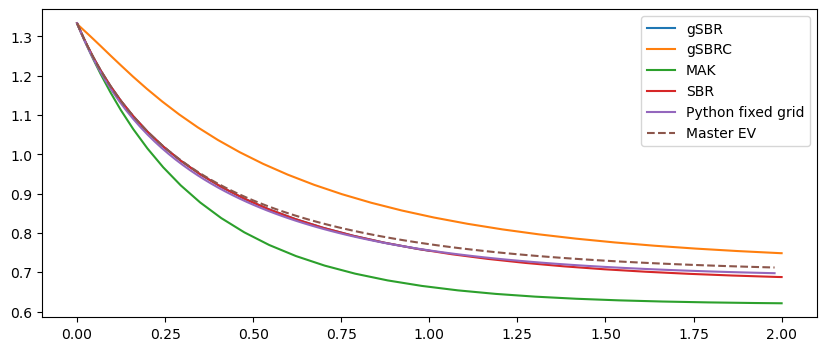

In [218]:
figure(figsize=(10,4))
subplot(111)
plot(sol_aaaSBR.t,variables_aaa.μ[1,:],label="gSBR")
plot(sol_aaaSBRC.t,variables_aaa_SBRC.μ[1,:],label="gSBRC")
plot(sol_aaa_MAK.t,variables_aaa_MAK.μ[1,:],label="MAK")
plot(sol_aaaSBR_singleSBR.t,variables_aaa_singleSBR.μ[1,:],label="SBR")
plot(collect(values(aaa_python_SBR_mixed[1])),collect(values(aaa_python_SBR_mixed[2])),label="Python fixed grid")
plot(collect(values(aaa_masterEV[1])),collect(values(aaa_masterEV[2])),label="Master EV",linestyle="dashed")
legend()
gcf()

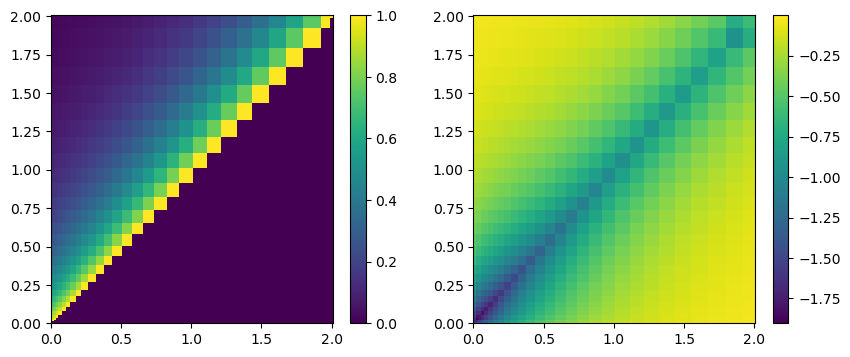

In [23]:
figure(figsize=(10,4))
subplot(121)
#imshow(variables_aaa.R[1,1,:,:])
pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.R[1,1,:,:])
colorbar()
gcf()

subplot(122)
#imshow(variables_aaa.C[1,1,:,:])
pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,1,:,:])
colorbar()
gcf()

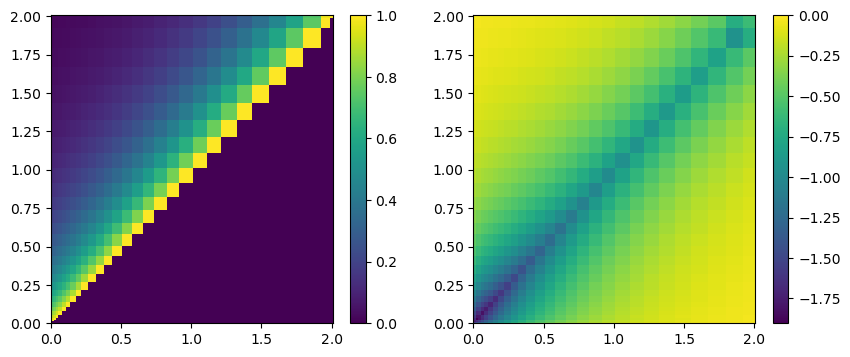

In [84]:
figure(figsize=(10,4))
subplot(121)
#imshow(variables_aaa.R[1,1,:,:])
pcolor(sol_aaaSBR_singleSBR.t,sol_aaaSBR_singleSBR.t,variables_aaa_singleSBR.R[1,:,:])
colorbar()
gcf()

subplot(122)
#imshow(variables_aaa.C[1,1,:,:])
pcolor(sol_aaaSBR_singleSBR.t,sol_aaaSBR_singleSBR.t,variables_aaa_singleSBR.C[1,:,:])
colorbar()
gcf()

#### Compare with Mass action or Mean field:

In [24]:
oprob_aaa = solve(ODEProblem(rs_aaa,[],(tstart,tmax),combinatoric_ratelaws=false),saveat = sol_aaaSBR.t)
sol_aaaMAK = [oprob_aaa.u[i][1] for i in 1:length(oprob_aaa.t)]

40-element Vector{Float64}:
 1.3333333333333333
 1.3333312222260902
 1.3333206668059154
 1.3332799903751764
 1.3332172784718948
 1.33298757867493
 1.33225027258144
 1.3304425949766598
 1.3274639599788287
 1.3209207774629685
 ⋮
 0.6587400740783568
 0.6500022574971894
 0.642931439768623
 0.6372775449813499
 0.6327939000623681
 0.6292658812217
 0.6265256954933008
 0.6244138746358651
 0.6242450051844357

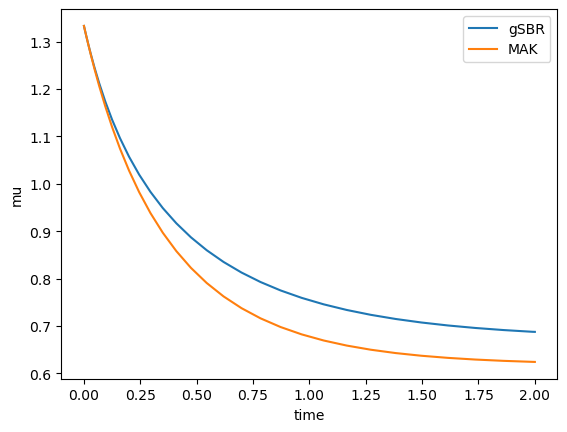

In [28]:
figure()
plot(sol_aaaSBR.t,variables_aaa.μ[1,:],label="gSBR")
plot(oprob_aaa.t,sol_aaaMAK,label="MAK")
ylabel("mu")
xlabel("time")
legend()
gcf()

### Define the $A+B \rightarrow C$ reaction:

In [56]:
#Parameters simulation
tstart= 0.
tmax = 1.
atol = 1e-3
rtol = 1e-2

0.01

In [29]:
rs_abc = @reaction_network ABC begin
    @species A(t) = 4. /3 B(t) = 2.0 C(t) = 1.0
    @parameters k1A = 4 k1B = 4 k1C = 3 k2A = 3 k2B = 2 k2C = 3 k3 = 1.
  (k3), A+B --> C
  (k2A,k1A), A <--> 0
  (k2B,k1B), B <--> 0
  (k2C,k1C), C <--> 0  
end

Model ABC
States (3):
  A(t) [defaults to 1.33333]
  B(t) [defaults to 2.0]
  C(t) [defaults to 1.0]
Parameters (7):
  k1A [defaults to 4]
  k1B [defaults to 4]
  k1C [defaults to 3]
  k2A [defaults to 3]
⋮

In [57]:
structure_abc = ReactionStructure(rs_abc)
variables_abc = ReactionVariables(structure_abc,"cross")
sol_abcSBR    = solve_dynamics!(structure_abc,variables_abc,atol,rtol,tmax,tstart,"gSBR");

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 1.9691749140705268e-5
t: 3.857070414195146e-5
t: 0.0001045990933720136
t: 0.0002819108885961499
t: 0.0006828397828569123
t: 0.0013232478580357066
t: 0.002612631124060223
t: 0.004500463372053258
t: 0.007577486480617615
t: 0.011690928428066053
t: 0.01754460210530145
t: 0.024894067996644696
t: 0.03438970895282185
t: 0.045792821931118395
t: 0.059551410078219374
t: 0.07456020276876625
t: 0.09147654830540779
t: 0.11032976641692327
t: 0.1309965158526195
t: 0.1536006022444704
t: 0.17814806078681036
t: 0.20463000495500244
t: 0.23306190655009193
t: 0.26343482727735434
t: 0.2957328913711941
t: 0.3299365025708779
t: 0.3660168087348095
t: 0.4039387315560019
t: 0.4436617205115558
t: 0.485139843029665
t: 0.5283229514691439
t: 0.5731575548948533
t: 0.6195876509823033
t: 0.6675556489822148
t: 0.7170031990925513
t: 0.7678719475036001
t: 0.8201042142365021
t: 0.8736435667882101
t: 0.9284352915738732
t: 0.9844267657871705
  0.613253 seconds (22.17 M allocations:

In [58]:
variables_abc_MAK = ReactionVariables(structure_abc,"cross")
sol_abc_MAK    = solve_dynamics!(structure_abc,variables_abc_MAK,atol,rtol,tmax,tstart,"MAK");

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 1.969175214558788e-5
t: 3.8570717584737275e-5
t: 0.00010459920333017689
t: 0.00028191060398219473
t: 0.0006828422875385536
t: 0.0013232538299356303
t: 0.0026126306852459064
t: 0.004500302206789092
t: 0.007577034104099853
t: 0.011689092736138827
t: 0.01754059019661361
t: 0.024883634162689554
t: 0.03437073906653447
t: 0.04575472508174573
t: 0.05949174758800167
t: 0.07446632877742772
t: 0.09133932459477723
t: 0.11014062557167069
t: 0.13075342244199206
t: 0.15330577385025207
t: 0.17781164667608323
t: 0.20427301047091487
t: 0.23271655805151936
t: 0.263146469138986
t: 0.29556082037146986
t: 0.32995379739478203
t: 0.3663098285396017
t: 0.4046058264356228
t: 0.444811314646691
t: 0.4868881209117734
t: 0.5307912404063091
t: 0.5764696004828955
t: 0.6238669714938471
t: 0.6729231088613573
t: 0.7235749189653178
t: 0.7757576248683965
t: 0.8294058846883516
t: 0.8844548003282909
t: 0.9408407891227415
t: 0.9985023008715652
  0.022796 seconds (275.47 k allocati

In [85]:
variables_abc_singleSBR = Achedmy.ReactionVariables(structure_abc,"single")
sol_abcSBR_singleSBR = Achedmy.solve_dynamics!(structure_abc,variables_abc_singleSBR,atol,rtol,tmax,tstart,"SBR");

t: 0.0
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0t: 1.0e-6
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0t: 5.999999999999999e-6
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0t: 2.5737179590019625e-5
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0t: 5.635219132608329e-5
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0t: 0.00016506661248552853
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0t: 0.0005140108615062979
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0t: 0.00136018487005149
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0t: 0.002753259704256666
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0t: 0.005816835872043888
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0t: 0.010441515059366802
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0t: 0.01838489212777937
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0t: 0.02910942636680775
-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0.0-0

In [70]:
## Read the results of the fixed timeGrid Python code for comparison
abc_python_SBR = CSV.File("../data/ABC_SBR_python.csv",header=0)
abc_masterEV = CSV.File("../data/ABC_Master_EV.csv",header=0)
#aaa_python_SBR_mixed = CSV.File("../data/AAA_SBR_mixed_python_fixed_timeGrid.csv",header=0)


4-element CSV.File:
 CSV.Row: (Column1 = 0.0, Column2 = 0.02, Column3 = 0.04, Column4 = 0.06, Column5 = 0.08, Column6 = 0.1, Column7 = 0.12, Column8 = 0.14, Column9 = 0.16, Column10 = 0.18, Column11 = 0.2, Column12 = 0.22, Column13 = 0.24, Column14 = 0.26, Column15 = 0.28, Column16 = 0.3, Column17 = 0.32, Column18 = 0.34, Column19 = 0.36, Column20 = 0.38, Column21 = 0.4, Column22 = 0.42, Column23 = 0.44, Column24 = 0.46, Column25 = 0.48, Column26 = 0.5, Column27 = 0.52, Column28 = 0.54, Column29 = 0.56, Column30 = 0.58, Column31 = 0.6, Column32 = 0.62, Column33 = 0.64, Column34 = 0.66, Column35 = 0.68, Column36 = 0.7, Column37 = 0.72, Column38 = 0.74, Column39 = 0.76, Column40 = 0.78, Column41 = 0.8, Column42 = 0.82, Column43 = 0.84, Column44 = 0.86, Column45 = 0.88, Column46 = 0.9, Column47 = 0.92, Column48 = 0.94, Column49 = 0.96, Column50 = 0.98)
 CSV.Row: (Column1 = 1.333333, Column2 = 1.283698, Column3 = 1.240688, Column4 = 1.203308, Column5 = 1.170736, Column6 = 1.142288, Column7

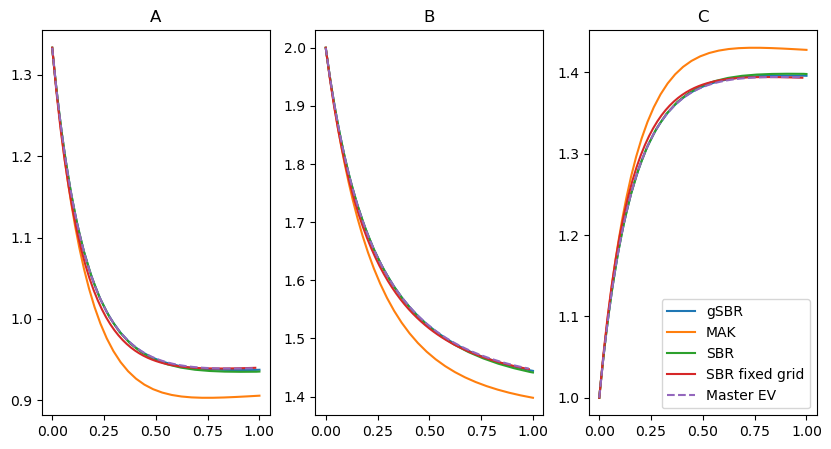

In [71]:
figure(figsize=(10,5))

for i in 1:structure_abc.num_species
    subplot(1,3,i)
    plot(sol_abcSBR.t,variables_abc.μ[i,:],label="gSBR")
    plot(sol_abc_MAK.t,variables_abc_MAK.μ[i,:],label="MAK")
    plot(sol_abcSBR_singleSBR.t,variables_abc_singleSBR.μ[i,:],label="SBR")
    plot(collect(values(abc_python_SBR[1])),collect(values(abc_python_SBR[1+i])),label="SBR fixed grid")
    plot(collect(values(abc_masterEV[1])),collect(values(abc_masterEV[1+i])),label="Master EV",linestyle="dashed")
    title(string(Char(i - 1 + 'A')))
end
legend()
gcf()

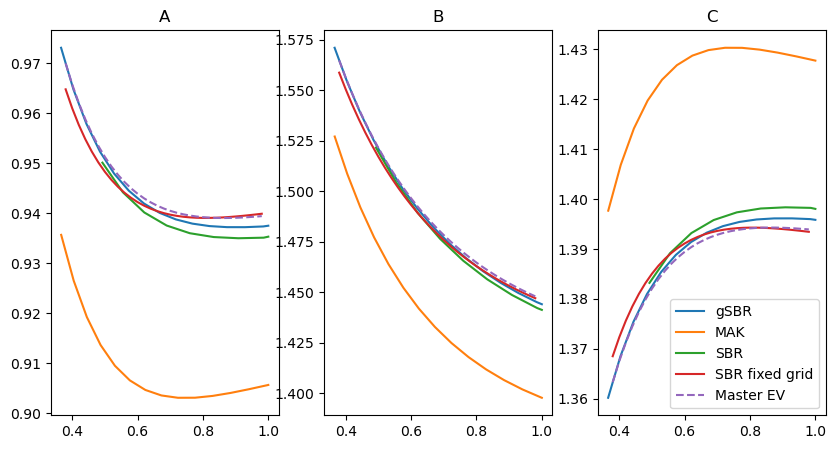

In [72]:
n1 = 30
n2 = 25
n3 = 20
figure(figsize=(10,5))

for i in 1:structure_abc.num_species
    subplot(1,3,i)
    plot(sol_abcSBR.t[n1:end],variables_abc.μ[i,n1:end],label="gSBR")
    plot(sol_abc_MAK.t[n1:end],variables_abc_MAK.μ[i,n1:end],label="MAK")
    plot(sol_abcSBR_singleSBR.t[n2:end],variables_abc_singleSBR.μ[i,n2:end],label="SBR")
    plot(collect(values(abc_python_SBR[1]))[n3:end],collect(values(abc_python_SBR[1+i]))[n3:end],label="SBR fixed grid")
    plot(collect(values(abc_masterEV[1]))[n3:end],collect(values(abc_masterEV[1+i]))[n3:end],label="Master EV",linestyle="dashed")
    title(string(Char(i - 1 + 'A')))
end
legend()
gcf()

In [3]:
function plot_all_moddiag(rxn_variables,solution)
    
    #Plots the diagonal values separately for the self-energy
    #This equalizes the scale difference so that the values are better visible
    
    subplot(231)
    for i in 1:length(rxn_variables.μ[:,1])
        PyPlot.plot(solution.t, rxn_variables.μ[i,:])
    end
    #PyPlot.plot(solution.t, rxn_variables.μ[1,:])
    #PyPlot.plot(solution.t, rxn_variables.μ[2,:])
    #PyPlot.plot(solution.t, rxn_variables.μ[3,:])
    ylabel("mu")

    subplot(232)
    PyPlot.plot(1:length(solution.t),solution.t)
    ylabel("time")

    subplot(233)
    PyPlot.plot(1:length(solution.t),solution.w[length(solution.t)])
    ylabel("time step")
    yscale("log")

    subplot(234)
    #imshow(rxn_variables.R[1,:,:])
    pcolor(solution.t,solution.t,rxn_variables.R[1,:,:],shading="auto")
    colorbar()
    #colorbar(shrink=0.6)
    ylabel("Resp(t,t')")
    xlabel("t'")
    
    temp = deepcopy(rxn_variables.Σ_R[1,1:length(solution.t),1:length(solution.t)])
    
    for i in 1:length(solution.t)
        #temp[i,i] *= solution.w[length(solution.t)][i]
        temp[i,i] = 0
    end
    
    subplot(235)
    #imshow(temp)
    pcolor(solution.t,solution.t,temp,shading="auto")
    #colorbar(shrink=0.6)
    colorbar()
    ylabel(r"$\Sigma_R (t,t')$")
    xlabel("t'")
    
    subplot(236)
    PyPlot.plot(1:length(solution.t),diag(rxn_variables.Σ_R[1,1:length(solution.t),1:length(solution.t)].*abs.(solution.w[length(solution.t)])))
    #PyPlot.plot(1:length(solution.t),diag(rxn_variables.Σ_R[1,1:length(solution.t),1:length(solution.t)]))

    ylabel("self-energy_diagonal")
    
    tight_layout()
    
end

plot_all_moddiag (generic function with 1 method)

In [86]:
function plot_all_moddiag_cross(rxn_variables,solution)
    
    #Plots the diagonal values separately for the self-energy
    #This equalizes the scale difference so that the values are better visible
    
    subplot(231)
    for i in 1:length(rxn_variables.μ[:,1])
        PyPlot.plot(solution.t, rxn_variables.μ[i,:])
    end
    #PyPlot.plot(solution.t, rxn_variables.μ[1,:])
    #PyPlot.plot(solution.t, rxn_variables.μ[2,:])
    #PyPlot.plot(solution.t, rxn_variables.μ[3,:])
    ylabel("mu")

    subplot(232)
    PyPlot.plot(1:length(solution.t),solution.t)
    ylabel("time")

    subplot(233)
    PyPlot.plot(1:length(solution.t),solution.w[length(solution.t)])
    ylabel("time step")
    yscale("log")

    subplot(234)
    #imshow(rxn_variables.R[1,:,:])
    pcolor(solution.t,solution.t,rxn_variables.R[1,1,:,:],shading="auto")
    colorbar()
    #colorbar(shrink=0.6)
    ylabel("Resp(t,t')")
    xlabel("t'")
    
    temp = deepcopy(rxn_variables.Σ_R[1,1,1:length(solution.t),1:length(solution.t)])
    
    for i in 1:length(solution.t)
        #temp[i,i] *= solution.w[length(solution.t)][i]
        temp[i,i] = 0
    end
    
    subplot(235)
    #imshow(temp)
    pcolor(solution.t,solution.t,temp,shading="auto")
    #colorbar(shrink=0.6)
    colorbar()
    ylabel(r"$\Sigma_R (t,t')$")
    xlabel("t'")
    
    subplot(236)
    PyPlot.plot(1:length(solution.t),diag(rxn_variables.Σ_R[1,1,1:length(solution.t),1:length(solution.t)].*abs.(solution.w[length(solution.t)])))
    #PyPlot.plot(1:length(solution.t),diag(rxn_variables.Σ_R[1,1:length(solution.t),1:length(solution.t)]))

    ylabel("self-energy_diagonal")
    
    tight_layout()
    
end

plot_all_moddiag_cross (generic function with 1 method)

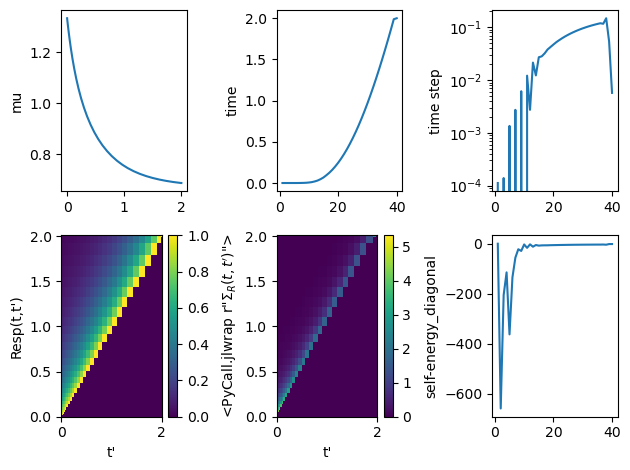

In [90]:
figure()
plot_all_moddiag_cross(variables_aaa,sol_aaaSBR)
gcf()